In [4]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from matplotlib.ticker import FormatStrFormatter
sns.set_theme(style="white")

In [5]:
def load_patient(preds_file):
    df = pd.read_csv(preds_file)
    rids = df.RID.unique()
    rid = np.random.choice(rids, 1)
    patient = df.loc[df.RID == rid[0]].iloc[::-1].reset_index(drop=True)
    index = patient["Forcast Month"].idxmin() + 1
    patient = patient.iloc[:index].iloc[::-1].reset_index(drop=True)
    return patient

In [6]:
def plot_patient_dx(patient, fig, ax):
   
    start = -5
    end = patient["Forcast Month"].iloc[-1] + 5
    
    plt.setp(ax, yticks=[0,1,2])
    plt.setp(ax, xticks=patient["Forcast Month"])
    ax.set_ylim([-0.5, 2.5])
    ax.set_xlim([end, start])

    
    
    pred = sns.lineplot(y="DX_pred", x="Forcast Month", alpha=.5, palette="muted",
            data=patient, ax=ax, label="Predicted dx")
    true = sns.lineplot(y="DX_true", x="Forcast Month", alpha=.5, palette="muted",
        data=patient, ax=ax, label="True dx")
    
    cn = patient[["Forcast Month", "CN relative probability", "CN"]]
    cn.columns = ["Forcast Month", "Probability", "Class"]
    mci = patient[["Forcast Month", "MCI relative probability", "MCI"]]
    mci.columns = ["Forcast Month", "Probability", "Class"]
    
    ad = patient[["Forcast Month", "AD relative probability", "AD"]]
    ad.columns = ["Forcast Month", "Probability", "Class"]
    probabilities = pd.concat([cn,mci,ad], axis=0)
   
    sns.scatterplot(y="Class", x="Forcast Month", alpha=.5, hue="Class", palette="muted", size="Probability",
            data=probabilities, sizes=(100, 1000), ax=ax)
    
    ax.get_legend().remove()
    #lgd = plt.legend(scatterpoints=1, labelspacing=1, bbox_to_anchor=(1.0, 0.95), loc='upper left')
    
    lgd = ax.legend(labels =["Diagnosis", "Diagnosis true"],loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
    
    #plt.tight_layout()

    

In [7]:
def plot_patient_continuous(patient, var_name, fig, ax):
    plt.setp(ax, xticks=patient["Forcast Month"])
    var_name_true = var_name + "_true"
    pred = sns.lineplot(y=var_name, x="Forcast Month", alpha=.5, palette="muted",
        data=patient, ax=ax, label=var_name, marker='o')
    true = sns.lineplot(y=var_name_true, x="Forcast Month", alpha=.5, palette="muted",
            data=patient, ax=ax, label=var_name_true, marker='o')
    ax.get_legend().remove()
    lgd = ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
    return lgd
    

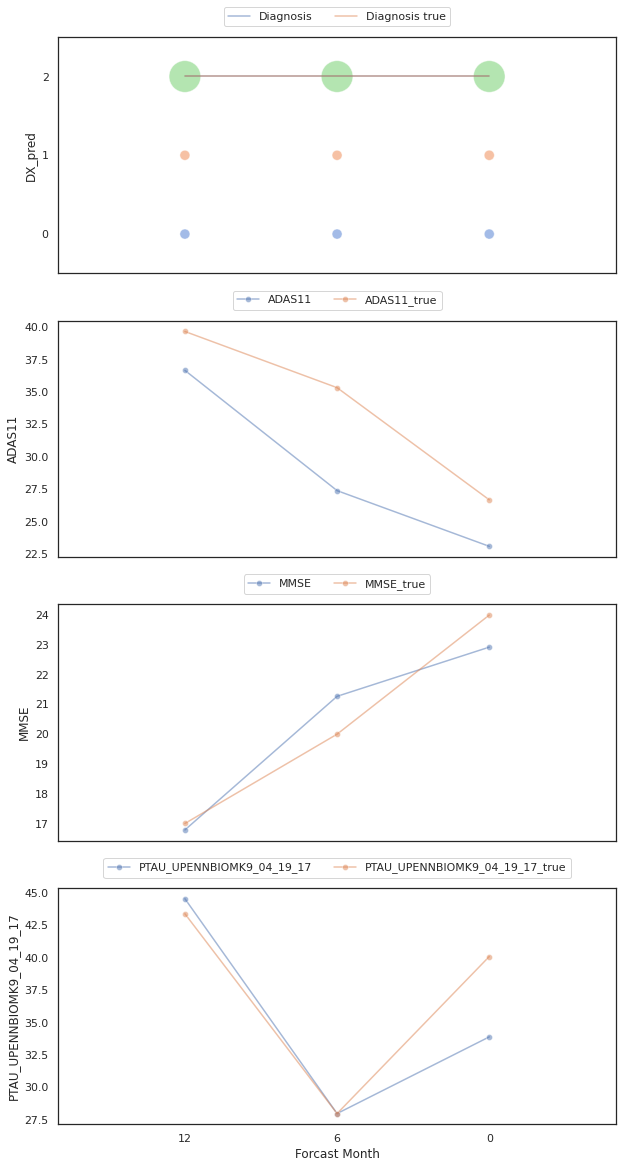

In [8]:
file = "data/0_prediction.csv"
fig, (ax_dx, ax_ada, ax_mmse, ax) = plt.subplots(4,1, figsize=(10,20), sharex=True)

patient = load_patient(file)
patient["CN"] = 0.
patient["MCI"] = 1.
patient["AD"] = 2.
plot_patient_dx(patient,fig, ax_dx)
plot_patient_continuous(patient, "MMSE",fig, ax_mmse)

plot_patient_continuous(patient, "ADAS11", fig, ax_ada)
plot_patient_continuous(patient, "PTAU_UPENNBIOMK9_04_19_17", fig, ax)
ax_ada.autoscale()
ax_mmse.autoscale()
ax.autoscale()

plt.savefig("figures/progressions/patient_{}_progression.png".format(patient.RID[0]),bbox_inches="tight", dpi=300)

#print(patient)
